# パーセプトロンによる識別関数
直線の式は
$$
y = -(w_0 + w_1x)w_2\\
$$
$ \boldsymbol{w}$の最適化を目指す

In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns; sns.set()

import matplotlib.animation as animation

sns.set_context('talk')

np.random.seed(12345)

## データ生成と確認

(-2.0, 6.0)

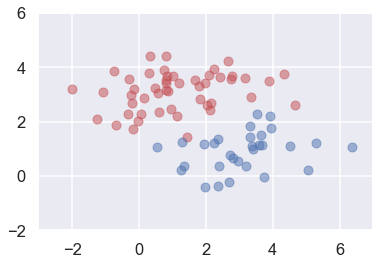

In [2]:
mu1 = np.array([1, 3])  # クラス1の中心
mu2 = np.array([3, 1])  # クラス2の中心
cov = 2 *np.array([[1.0,0.2], [0.2, 0.3]])  # 共分散行列（全クラス共通）
cov1 = cov2 = cov

N1 = 50
N2 = 30

x1 = np.random.multivariate_normal(mu1, cov1, N1)
x2 = np.random.multivariate_normal(mu2, cov2, N2)
x = np.vstack((x1, x2))

# ラベルは±1 ￥を張り付けておく
y1 = np.ones(N1)
y2 = -np.ones(N2)
y = np.hstack((y1, y2))

plt.plot(x[y==1, 0], x[y==1, 1], 'ro', alpha=0.5)
plt.plot(x[y==-1, 0], x[y==-1, 1], 'bo', alpha=0.5)

plt.xlim(-3, 7)
plt.ylim(-2, 6)

In [5]:
# 出力層
def predict(x, w):
    return np.sign(weight_sum(w, x))

# 重みの合計値
def weight_sum(w, x):
    N = x.shape[0]
    xnew = np.hstack((np.ones((N, 1)), x))
    print(xnew)
    print(w)
    return xnew @ w

# 結果の表示
def drawfig(x, y, w, xrng=(0, 1)):
    xx1 = np.linspace(xrng[0], xrng[1])
    xx2 = (w[0] + w[1] * xx1) / (-w[2])
    im = plt.plot(xx1, xx2, 'g-', linewidth=3)
    return im

# wの更新
def update_w(w, x, t, eta=0.0001):
    ws = weight_sum(w, x)
    # N*1
    N = x.shape[0]
    xnew = np.hstack((np.ones((N, 1)), x))
    
    # 不正解index
    failset = t * ws < 0 
    # 更新量の計算
    delta = eta * t[failset] @ xnew[failset, :]
    return w + delta

# コスト関数
def Ep(w, x, t):
    ws = weight_sum(w, x)
    print(ws)
    failset = t * ws < 0
    return - weight_sum(w, x[failset,:]) @ t[failset]

w = np.random.uniform(low=-1, high=1, size=3)
Ep(w, x, y)

[[ 1.          1.20075506  3.40152774]
 [ 1.          1.82882935  2.81606553]
 [ 1.         -2.00864502  3.21408246]
 [ 1.          0.81886609  3.15673998]
 [ 1.         -0.30348623  3.56005709]
 [ 1.         -0.17896585  1.74449488]
 [ 1.          0.57299237  3.05303239]
 [ 1.         -1.05756475  3.0980598 ]
 [ 1.          3.87469274  3.49306915]
 [ 1.         -1.26198484  2.08043644]
 [ 1.          1.67104864  3.52499719]
 [ 1.         -3.37299531  1.09620752]
 [ 1.          1.78707425  3.29926094]
 [ 1.          0.48106778  3.24299699]
 [ 1.          0.75631403  3.9122986 ]
 [ 1.          2.15076897  2.7013156 ]
 [ 1.          4.66024594  2.61917054]
 [ 1.          2.10632806  3.70105336]
 [ 1.          2.75407103  3.55293884]
 [ 1.          2.43171426  3.62223378]
 [ 1.          4.34546492  3.74335939]
 [ 1.          3.33798432  2.91511482]
 [ 1.          2.78168092  3.68134083]
 [ 1.          0.60578427  2.34719935]
 [ 1.          0.29187996  3.79327457]
 [ 1.          0.85749668

18.178679368244477

Ep 0 epochs: 31.432726276177412
Ep 1 epochs: 0.8305474507684494
Ep 21 epochs: 0.3435483940261277
Ep 41 epochs: 0.21248702778604583
Ep 61 epochs: 0.08142566154596331
Ep 81 epochs: 0.018783058230669558
Ep 101 epochs: 0.0181993802329678
Ep 121 epochs: 0.019321972470031312
Ep 141 epochs: 0.020444564707094826
Ep 161 epochs: 0.017476471902148683
Ep 181 epochs: 0.018010061949619682


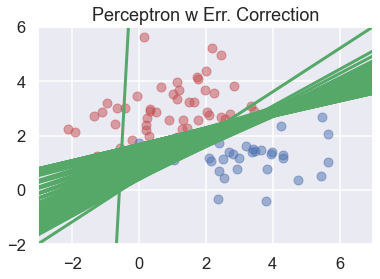

In [11]:
# 重みの初期化
w = np.random.uniform(low=-1, high=1, size=3)

fig = plt.figure()
plt.plot(x[y==1, 0], x[y==1, 1], 'ro', alpha=0.5)
plt.plot(x[y==-1, 0], x[y==-1, 1], 'bo', alpha=0.5)
plt.title('Perceptron w Err. Correction')
plt.xlim(-3, 7)
plt.ylim(-2, 6) 

xrng = (-3, 7) 

ims = []
Eps = []

ims.append(drawfig(x, y, w, xrng=xrng))
Eps.append(Ep(w, x, y))
print("Ep {} epochs: {}".format(0, Ep(w, x, y)))

for n in range(200):
    w = update_w(w, x, y, eta=0.0025)
    ims.append(drawfig(x, y, w, xrng=xrng))
    Eps.append(Ep(w, x, y))
    if n%20==0:
        print("Ep {} epochs: {}".format(n+1, Ep(w, x, y)))

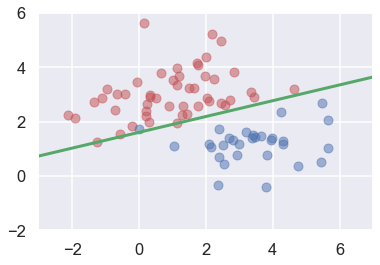

In [14]:
# 最終結果
plt.figure()

plt.plot(x[y==1, 0], x[y==1, 1], 'ro', alpha=0.5)
plt.plot(x[y==-1, 0], x[y==-1, 1], 'bo', alpha=0.5)

plt.xlim(-3, 7)
plt.ylim(-2, 6) 

drawfig(x, y, w, xrng=xrng)

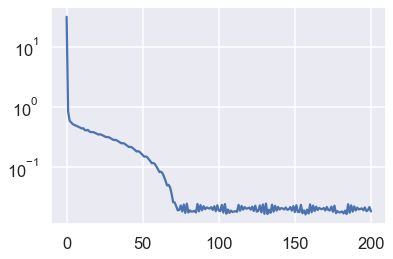

In [15]:
# コスト関数の減少
plt.semilogy(np.array(Eps))